In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Create an engine to connect to sqlite database
engine = create_engine('sqlite:///water_points.db')
conn = engine.connect()
df = pd.read_sql_table('etlTable', con=conn)


In [3]:
# Get water points in Osun State
osun = df[df.state=='Osun']
# Use these numerical columns to perform clustering
osun1 = osun.loc[:, ['id' ,'latitude', 'longitude']]

In [4]:
# PCA is used to reduce the number of dimensions to visualize the results using a 2D Scatter plot
pca = PCA(2)
osun1 = pca.fit_transform(osun1)

In [5]:
# Create cluster feature
kmeans = KMeans(n_clusters=10)
cluster = kmeans.fit_predict(osun1)


In [6]:
#filter rows of osun data
filtered_label0 = osun1[cluster == 0]

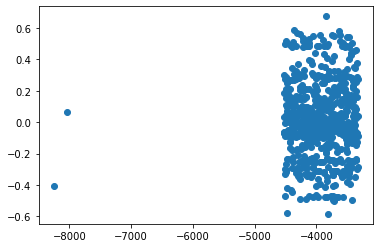

In [7]:
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

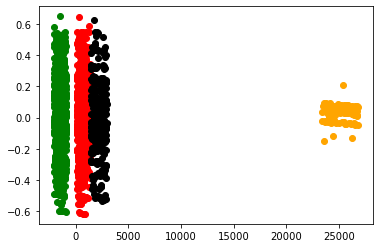

In [8]:
#filter rows of original data
filtered_label2 = osun1[cluster == 2]
filtered_label4 = osun1[cluster == 4]
filtered_label6 = osun1[cluster == 6]
filtered_label8 = osun1[cluster == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'green')
plt.scatter(filtered_label6[:,0] , filtered_label6[:,1] , color = 'orange')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

In [9]:
# Get the unique labels of the clusters
u_labels = np.unique(cluster)

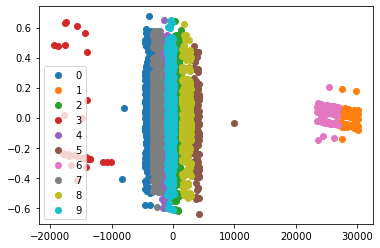

In [10]:
# Visualize all the clusters in a single diagram
for i in u_labels:
    plt.scatter(osun1[cluster == i , 0] , osun1[cluster == i , 1] , label = i)
plt.legend()
plt.show()

In [11]:
# Use Yellow Brick (Elbow) Algorithm to find Optimal Number of Clusters
from yellowbrick.cluster import KElbowVisualizer

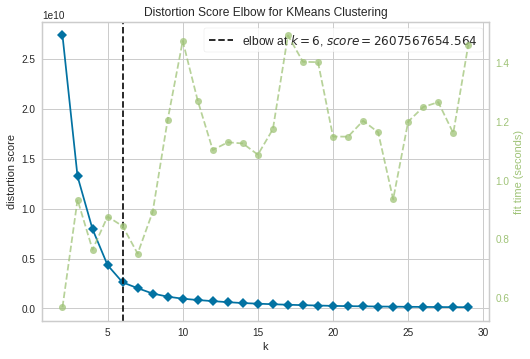

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(osun1)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [13]:
osun2 = osun.loc[:, ['id' ,'latitude', 'longitude']]
osun2 = pca.fit_transform(osun2)
# Create cluster feature
# Optimal clusters = 6
kmeans = KMeans(n_clusters=6)
label = kmeans.fit_predict(osun2)

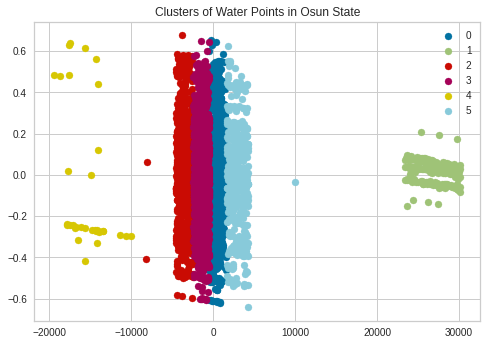

In [14]:
# Get the unique labels of the clusters
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(osun2[label == i , 0] , osun2[label == i , 1] , label = i)
plt.title("Clusters of Water Points in Osun State")
plt.legend()
plt.show()

In [15]:
osun['cluster'] = label

<ipython-input-15-77523fb527a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osun['cluster'] = label


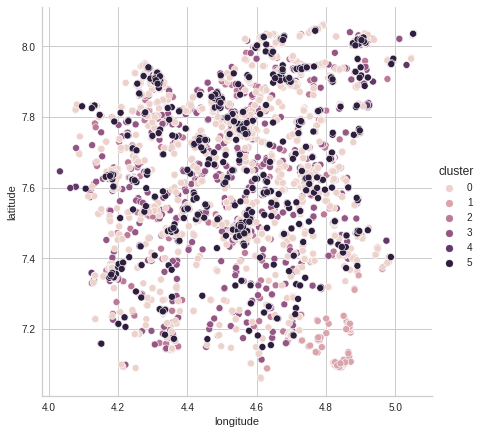

In [16]:
sns.relplot(
    x="longitude", y="latitude", hue="cluster", data=osun, height=6,
);

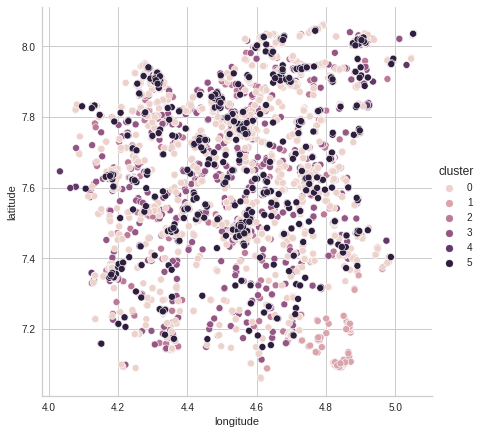

In [17]:
sns.relplot(
    x="longitude", y="latitude", hue="cluster", data=osun, height=6,
);

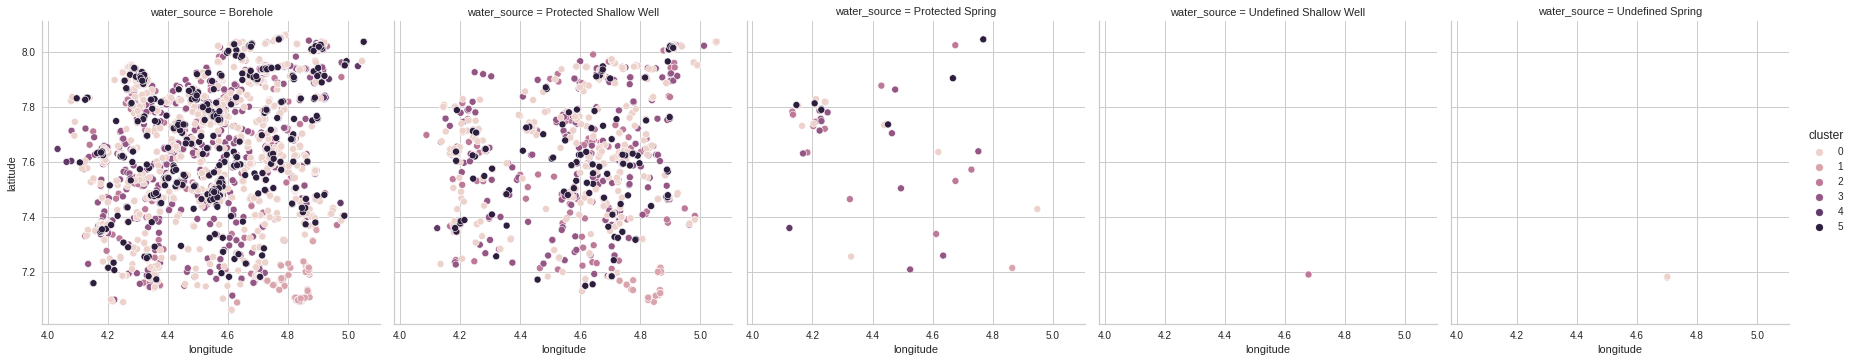

In [18]:
sns.relplot(data=osun, x="longitude", y="latitude", hue="cluster", col="water_source")

In [19]:
df.state.value_counts()

Jigawa                       10574
Kano                          7399
Katsina                       5776
Osun                          5126
Kaduna                        5122
Kwara                         3799
Oyo                           3472
Bauchi                        3335
Plateau                       2998
Niger                         2865
Cross River                   2787
Ondo                          2674
Taraba                        2653
Benue                         2640
Kebbi                         2611
Gombe                         2370
Ebonyi                        1964
Akwa Ibom                     1833
Sokoto                        1738
Zamfara                       1668
Nassarawa                     1654
Lagos                         1544
Yobe                          1544
Kogi                          1537
Ekiti                         1513
Ogun                          1127
Edo                           1111
Imo                           1070
Abia                

In [20]:
# Create Distances of the water points from the clusters' centroids
osun1 = osun.loc[:, ['id' ,'latitude', 'longitude']]
kmeans = KMeans(n_clusters=6, n_init=10, random_state=0)
print(osun1.head())
X_cd = kmeans.fit_transform(osun2)
print()
# Label features and join to dataset
X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
osun = osun.join(X_cd)

          id  latitude  longitude
22808  22809  7.601828   4.076799
23478  23479  7.602219   4.077900
24328  24329  7.828912   4.917603
24359  24360  7.829856   4.923392
24440  24441  7.449665   4.974490



In [22]:
#osun.head(10)

In [23]:
X_cd.head()

,Centroid_0,Centroid_1,Centroid_2,Centroid_3,Centroid_4,Centroid_5
0,15892.971815,46270.331614,17960.167191,19693.711902,22343.683657,3990.757614
1,15222.971815,45600.331614,17290.167191,19023.711902,21673.683657,3320.757620
2,14372.971807,44750.331610,16440.167183,18173.711894,20823.683649,2470.757583
3,14341.971807,44719.331610,16409.167183,18142.711894,20792.683649,2439.757583
4,14260.971798,44638.331603,16328.167175,18061.711886,20711.683642,2358.757570
